In [113]:
import pandas as pd
import numpy as np

In [114]:
# Read the file with a different encoding if needed
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")  # Try 'latin1' or 'windows-1252' if UTF-8 fails

# Save as UTF-8 encoded file
df.to_csv("spam_utf8.csv", index=False, encoding="utf-8")

In [115]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2123,spam,+123 Congratulations - in this week's competit...,NaN,NaN,NaN
888,ham,You unbelievable faglord,NaN,NaN,NaN
3925,ham,I havent add Ì_ yet right..,NaN,NaN,NaN
1730,ham,Doing project w frens lor.,NaN,NaN,NaN
551,ham,"Hurry up, I've been weed-deficient for like th...",NaN,NaN,NaN


In [116]:
df.shape

(5572, 5)

In [117]:
#1. Data cleaning
#2. EDA (Data Analysis)
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvements depending on the evaluation
#7. Website
#8. Deploy

# 1. Data Cleaning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [119]:
#3. Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [120]:
df.sample(5)

,v1,v2
3814,ham,"Not yet chikku..k, then wat abt tht guy did he..."
5248,ham,U come n search tat vid..not finishd..
3466,spam,URGENT! We are trying to contact U. Todays dra...
2259,ham,Ill call you evening ill some ideas.
492,ham,"Sorry,in meeting I'll call later"


In [121]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5370,spam,dating:i have had two of these. Only started a...
208,ham,You please give us connection today itself bef...
1466,ham,Your account has been refilled successfully by...
798,ham,Ok i msg u b4 i leave my house.
2572,ham,"The house is on the water with a dock, a boat ..."


In [122]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [123]:
df['target'] = encoder.fit_transform(df['target'])

In [124]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [126]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [127]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [128]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [129]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

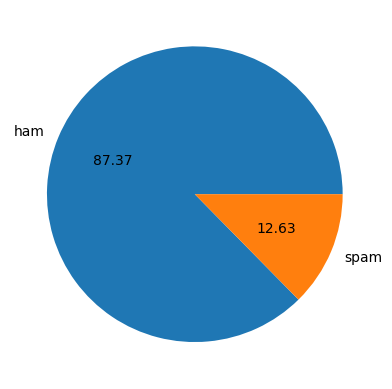

In [130]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [131]:
# Data is imbalanced

In [132]:
import nltk

In [133]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kshitij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
df['num_characters'] = df['text'].apply(len)

In [135]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [136]:
# fetch the number of words
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kshitij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [137]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [138]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [139]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [140]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [142]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [143]:
# Ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [144]:
# Spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [145]:
!pip install seaborn

In [146]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

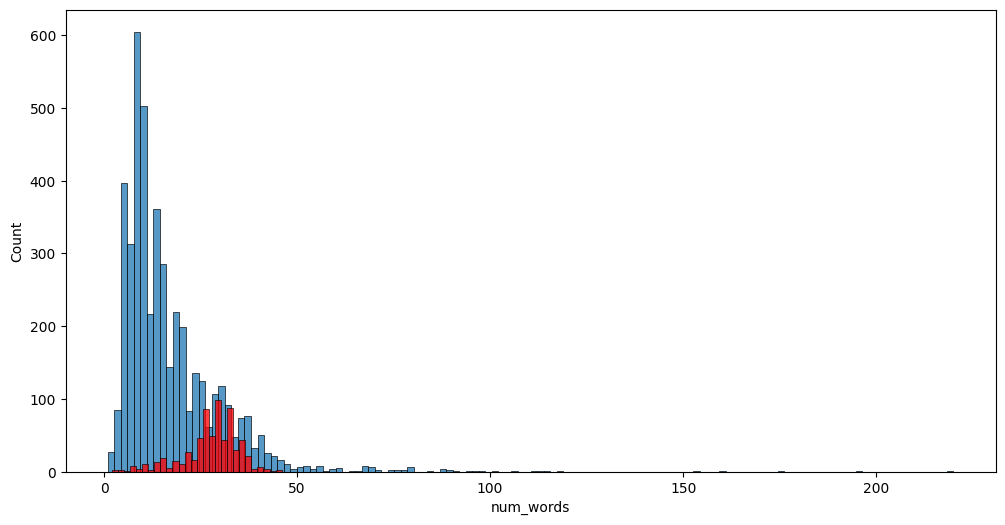

In [147]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

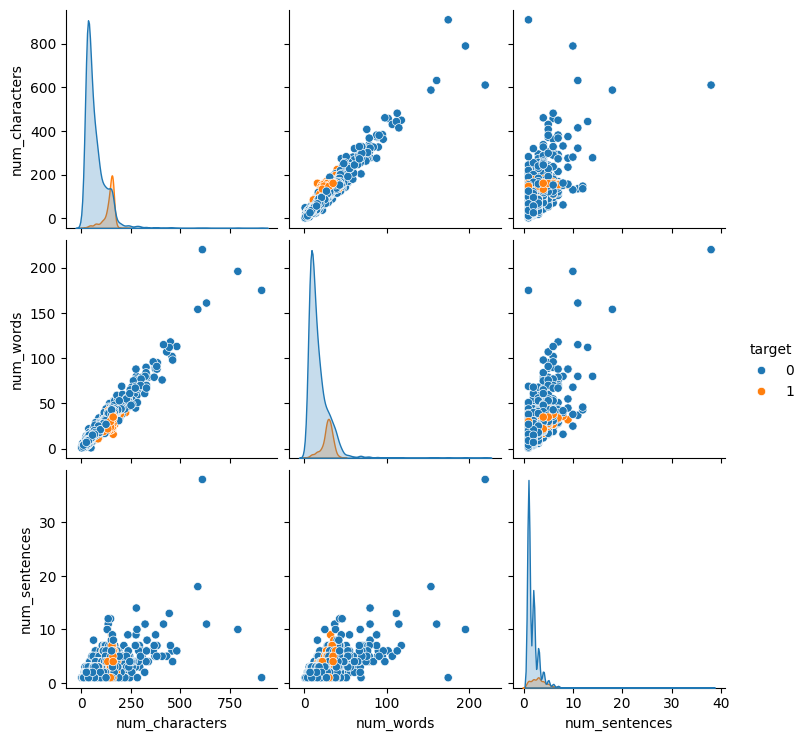

In [148]:
sns.pairplot(df,hue='target')

In [149]:
df.corr(numeric_only=True)  # Ensures only numeric data is used


,target,num_characters,num_words,num_sentences
target,1.000000,0.384711,0.262912,0.263939
num_characters,0.384711,1.000000,0.965763,0.624141
num_words,0.262912,0.965763,1.000000,0.679971
num_sentences,0.263939,0.624141,0.679971,1.000000


<Axes: >

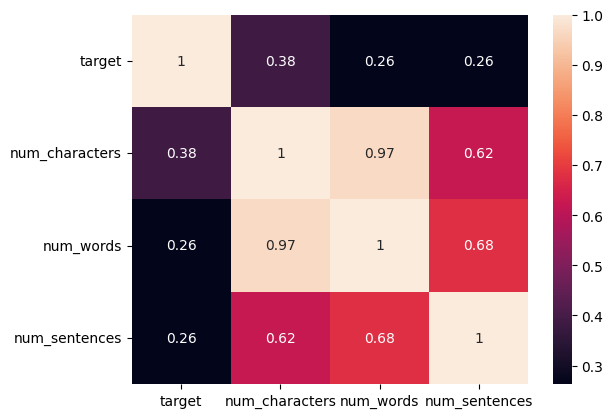

In [150]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# 3. Data Preprocessing
   - Lower case
   - Tokenization
   - Removing special characters
   - Removing stop words(is, are, the, etc.) and punctuation
   - Stemming(danced, dancing, etc to dance)

In [151]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [152]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kshitij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [153]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [154]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.") #removes special characters

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [155]:
df['text'][10] 

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [156]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [170]:
df['transformed_text'] = df['text'].apply(transform_text)

In [171]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
!pip install wordcloud

In [172]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [173]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

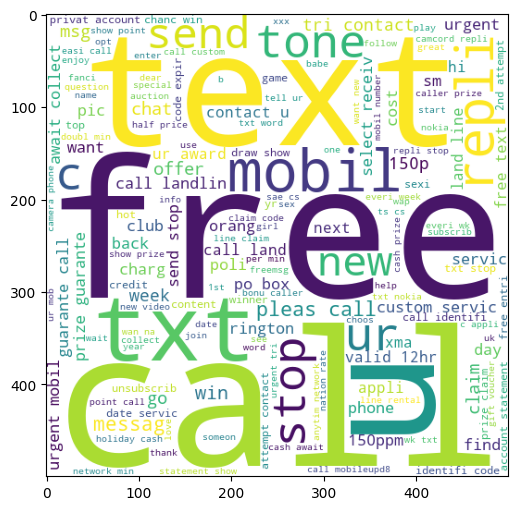

In [174]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [175]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

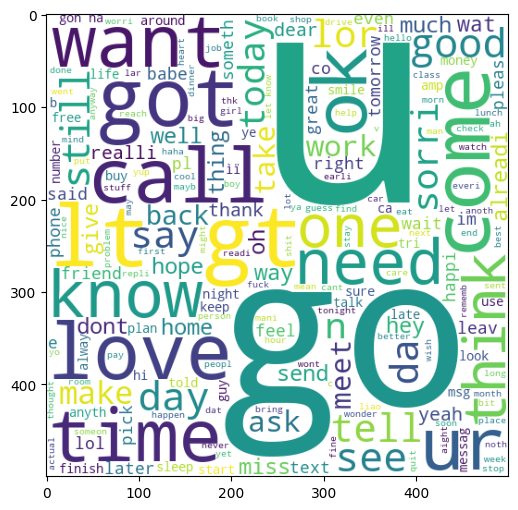

In [176]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [177]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [178]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [182]:
len(spam_corpus)

9939

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_23304\830335121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_common, palette="viridis")  # Corrected argument passing


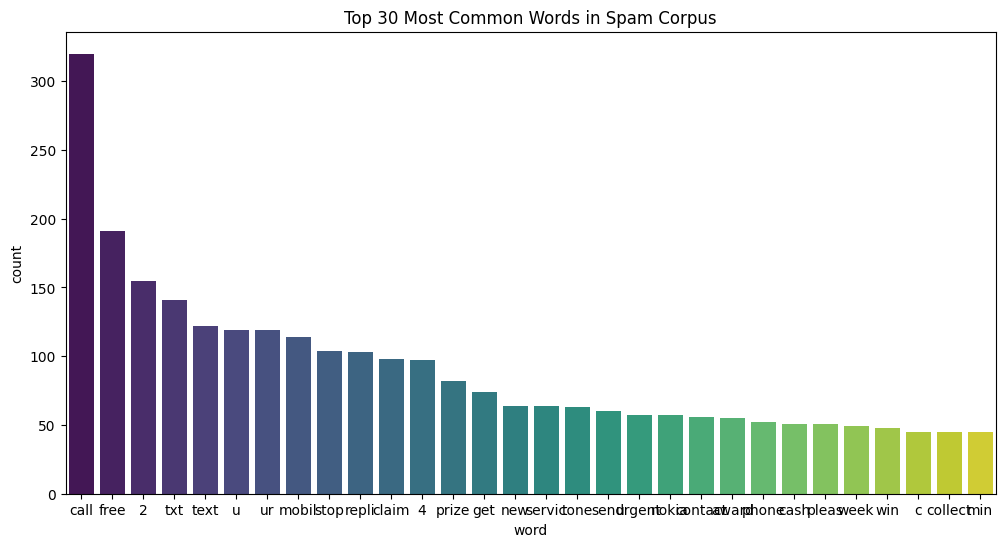

In [184]:
from collections import Counter
# Get the 30 most common words
common_words = Counter(spam_corpus).most_common(30)

# Convert to a DataFrame with column names
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, palette="viridis")  # Corrected argument passing
plt.xticks(rotation='horizontal')  # Rotate x-axis labels for better readability
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [185]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [186]:
len(ham_corpus)

35404

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_23304\1220614714.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_common, palette="pastel")  # Corrected argument passing


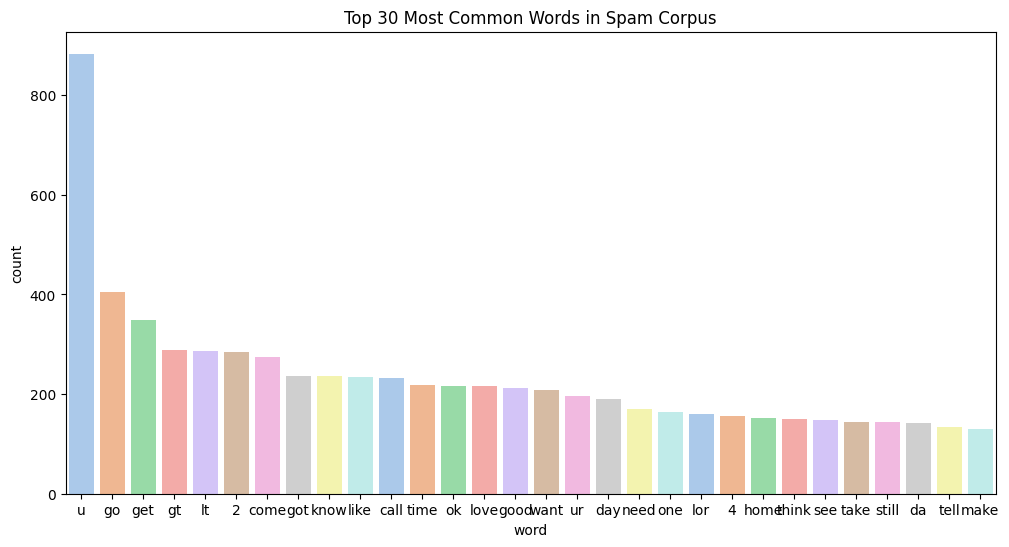

In [187]:
common_words = Counter(ham_corpus).most_common(30)

# Convert to a DataFrame with column names
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, palette="pastel")  # Corrected argument passing
plt.xticks(rotation='horizontal')  # Rotate x-axis labels for better readability
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [188]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [189]:
!pip install scikit-learn


In [190]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [191]:
X = tfidf.fit_transform(df['transformed_text']).toarray() 


In [192]:
X.shape


(5169, 6708)

In [193]:
y = df['target'].values

In [194]:
y



array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [197]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [198]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [199]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [200]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [201]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [202]:
# tfidf --> mnb

In [203]:
# model improve 
# 1. Change the max_features parameter of Tfidf

In [204]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))